In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from parse_gam.utils import (
    deduplicate_gdf,
    to_polygon,
    parse_yolo_predictions,
    project_onto_board,
)
from parse_gam.scripts.visualize_state import visualize_state

In [2]:
root_dir = Path(".").resolve().parent / "inference" / "vid1_hand3_smooth_4"
labels_dir = root_dir / "labels"
states_dir = root_dir / "states"
smooth_dir = root_dir / "smooth_states"

In [3]:
states = [json.load(x.open()) for x in states_dir.iterdir()]
dd = []

for s in states_dir.iterdir():
    filename = int(s.stem.split("_")[-1])
    d = json.load(s.open())
    d["file_index"] = filename
    dd.append(d)
    pass

states_df = pd.DataFrame(dd).sort_values(by="file_index").reset_index(drop=True)
states_df.head()

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
0,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,1
1,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,2
2,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,3
3,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,4
4,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,5


In [4]:
smooth_states = [json.load(x.open()) for x in smooth_dir.iterdir()]

smooth_states_df = (
    pd.DataFrame(smooth_states).sort_values(by="file_index").reset_index(drop=True)
)
smooth_states_df.head()

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
0,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,1
1,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,2
2,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,3
3,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,4
4,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,5


In [5]:
smooth_states_df[smooth_states_df.file_index == 29]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
17,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,29


<Axes: xlabel='file_index'>

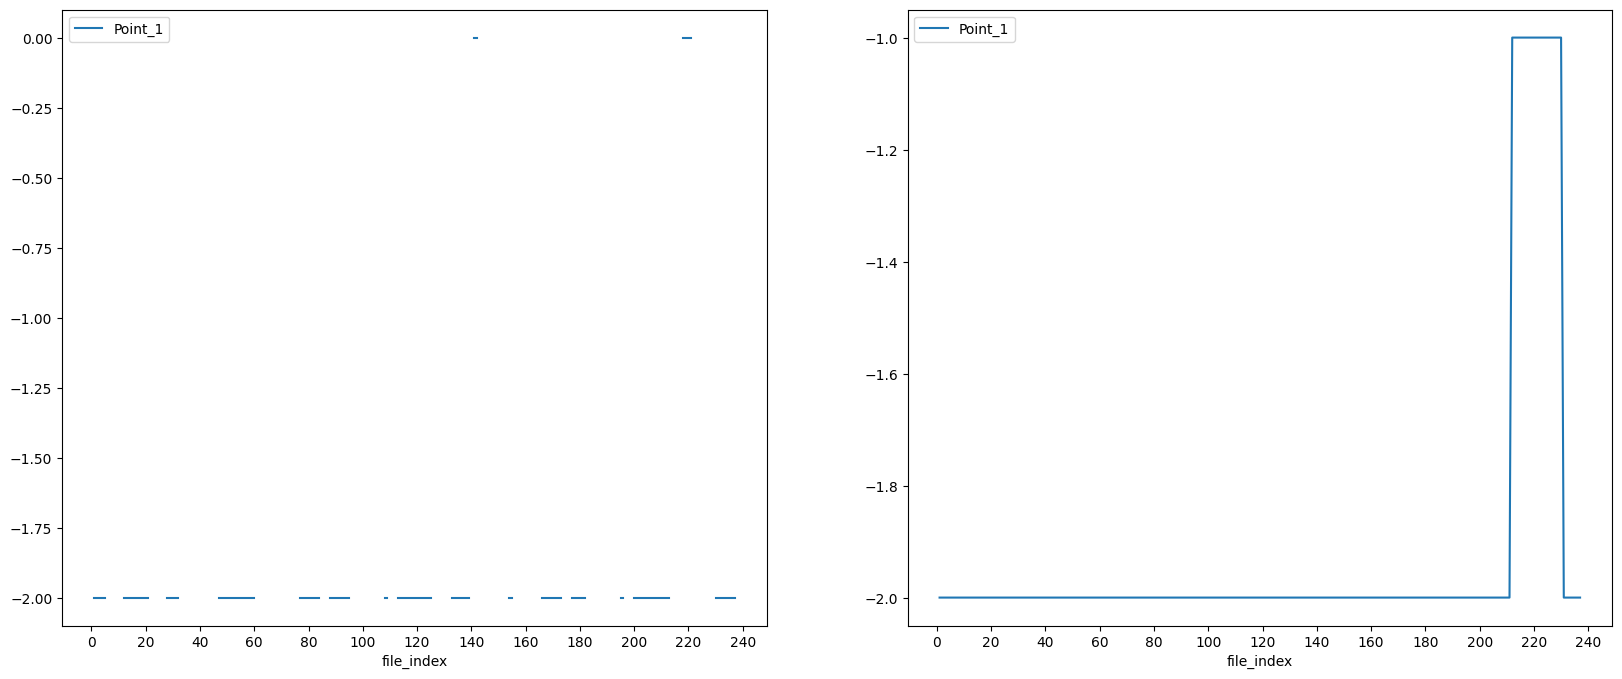

In [6]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# states_df.Point_24.plot(ax=ax[0])
states_df.plot(x="file_index", y="Point_1", ax=ax[0], xticks=range(0, 250, 20))
smooth_states_df.plot(x="file_index", y="Point_1", ax=ax[1], xticks=range(0, 250, 20))

In [7]:
states_df[states_df.file_index == 64]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OBSCURED,64


In [8]:
smooth_states_df[smooth_states_df.file_index == 77]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
38,-2,0,0,0,0,4,0,3,0,1,...,-2,0,-4,-2,0,1,0,1,VALID,77


In [9]:
states_df[states_df.status == "VALID"]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
0,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,1
1,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,2
2,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,3
3,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,4
4,-2.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,-3.0,0.0,-5.0,0.0,0.0,0.0,0.0,2.0,VALID,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,...,-2.0,0.0,-2.0,-2.0,1.0,-2.0,0.0,1.0,VALID,233
233,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,...,-2.0,0.0,-2.0,-2.0,1.0,-2.0,0.0,1.0,VALID,234
234,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,...,-2.0,0.0,-2.0,-2.0,1.0,-2.0,0.0,1.0,VALID,235
235,-2.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,...,-2.0,0.0,-2.0,-2.0,1.0,-2.0,0.0,1.0,VALID,236


In [10]:
smooth_states_df[smooth_states_df.status == "VALID"]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,status,file_index
0,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,1
1,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,2
2,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,3
3,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,4
4,-2,0,0,0,0,4,0,3,0,0,...,-3,0,-5,0,0,0,0,2,VALID,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-2,0,0,0,0,5,0,4,0,0,...,-2,0,-2,-2,1,-2,0,1,VALID,233
121,-2,0,0,0,0,5,0,4,0,0,...,-2,0,-2,-2,1,-2,0,1,VALID,234
122,-2,0,0,0,0,5,0,4,0,0,...,-2,0,-2,-2,1,-2,0,1,VALID,235
123,-2,0,0,0,0,5,0,4,0,0,...,-2,0,-2,-2,1,-2,0,1,VALID,236


In [11]:
d = smooth_states_df[smooth_states_df.status == "VALID"][
    [f"Point_{x}" for x in range(1, 25)]
].diff(axis="rows")

d = d.join(smooth_states_df[["file_index"]])
d

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,file_index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236


In [12]:
d[d[[x for x in d.columns if x != "file_index"]].abs().sum(axis="columns") != 0]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,file_index
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,31
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,48
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,60
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,77
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,93
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,108
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,114
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152


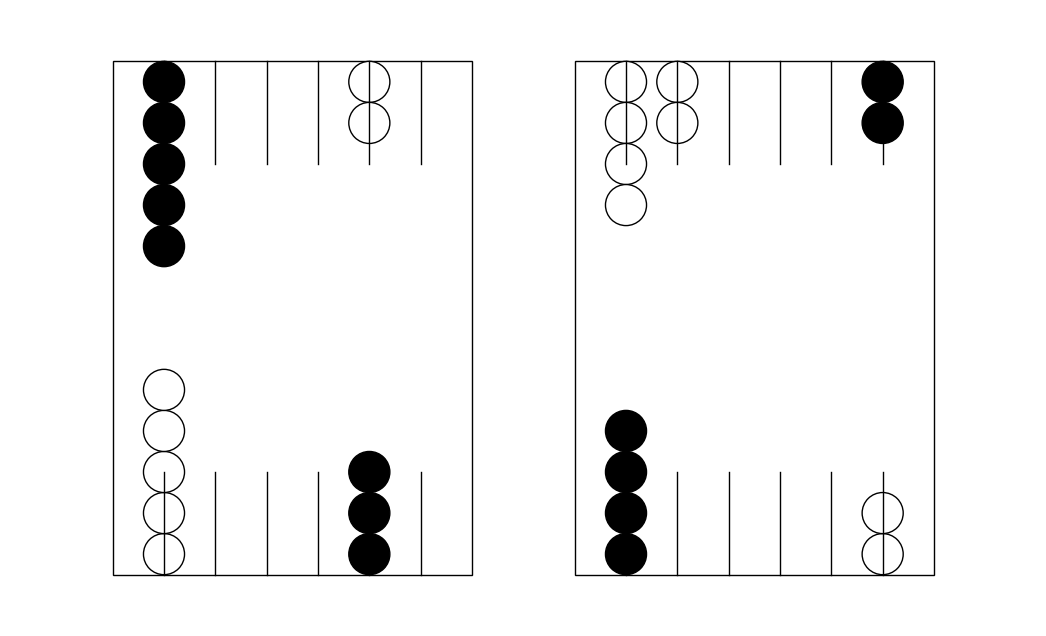

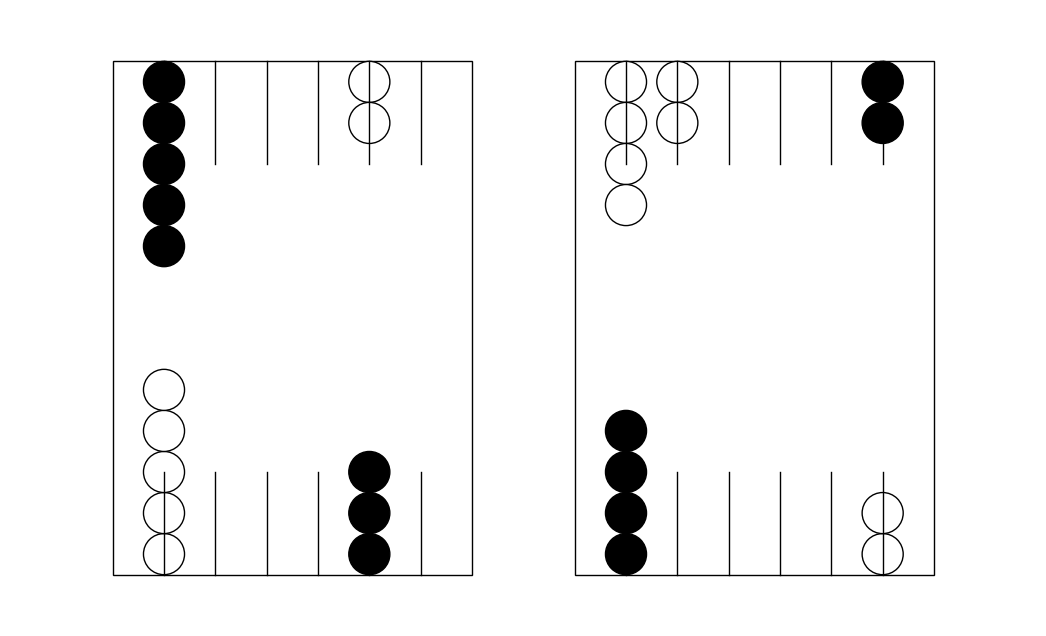

In [13]:
index = 24
s = smooth_states_df[smooth_states_df.status == "VALID"].iloc[index].to_dict()
f, ax = visualize_state(s, show=True)

s2 = smooth_states_df[smooth_states_df.status == "VALID"].iloc[index + 1].to_dict()
f, ax = visualize_state(s2, show=True)

In [14]:
# Move detection: Use diff When a diff is encountered: Check 10 steps ahead, coalesce any changes within these ten steps into a move

f = d[d[[x for x in d.columns if x != "file_index"]].abs().sum(axis="columns") != 0]

A = f.to_dict(orient="records")
A

[{'Point_1': 0.0,
  'Point_2': 0.0,
  'Point_3': 0.0,
  'Point_4': 0.0,
  'Point_5': 0.0,
  'Point_6': 0.0,
  'Point_7': 0.0,
  'Point_8': 0.0,
  'Point_9': 0.0,
  'Point_10': 0.0,
  'Point_11': 0.0,
  'Point_12': 0.0,
  'Point_13': 0.0,
  'Point_14': 0.0,
  'Point_15': 0.0,
  'Point_16': 0.0,
  'Point_17': 0.0,
  'Point_18': 0.0,
  'Point_19': 0.0,
  'Point_20': -1.0,
  'Point_21': 0.0,
  'Point_22': 0.0,
  'Point_23': 0.0,
  'Point_24': 0.0,
  'file_index': 31},
 {'Point_1': 0.0,
  'Point_2': 0.0,
  'Point_3': 0.0,
  'Point_4': 0.0,
  'Point_5': 0.0,
  'Point_6': 0.0,
  'Point_7': 0.0,
  'Point_8': 0.0,
  'Point_9': 0.0,
  'Point_10': 0.0,
  'Point_11': 0.0,
  'Point_12': 0.0,
  'Point_13': 0.0,
  'Point_14': 0.0,
  'Point_15': 0.0,
  'Point_16': 0.0,
  'Point_17': 0.0,
  'Point_18': 0.0,
  'Point_19': 1.0,
  'Point_20': 0.0,
  'Point_21': 0.0,
  'Point_22': 0.0,
  'Point_23': 0.0,
  'Point_24': 0.0,
  'file_index': 38},
 {'Point_1': 0.0,
  'Point_2': 0.0,
  'Point_3': 0.0,
  'Point_

In [15]:
b = []
for a_idx in range(len(A)):
    if len(b) == 0:
        b.append(A.pop(0))
        continue
    if A[0]["file_index"] <= b[0]["file_index"] + 10:
        b.append(A.pop(0))
    else:
        break

b

[{'Point_1': 0.0,
  'Point_2': 0.0,
  'Point_3': 0.0,
  'Point_4': 0.0,
  'Point_5': 0.0,
  'Point_6': 0.0,
  'Point_7': 0.0,
  'Point_8': 0.0,
  'Point_9': 0.0,
  'Point_10': 0.0,
  'Point_11': 0.0,
  'Point_12': 0.0,
  'Point_13': 0.0,
  'Point_14': 0.0,
  'Point_15': 0.0,
  'Point_16': 0.0,
  'Point_17': 0.0,
  'Point_18': 0.0,
  'Point_19': 0.0,
  'Point_20': -1.0,
  'Point_21': 0.0,
  'Point_22': 0.0,
  'Point_23': 0.0,
  'Point_24': 0.0,
  'file_index': 31},
 {'Point_1': 0.0,
  'Point_2': 0.0,
  'Point_3': 0.0,
  'Point_4': 0.0,
  'Point_5': 0.0,
  'Point_6': 0.0,
  'Point_7': 0.0,
  'Point_8': 0.0,
  'Point_9': 0.0,
  'Point_10': 0.0,
  'Point_11': 0.0,
  'Point_12': 0.0,
  'Point_13': 0.0,
  'Point_14': 0.0,
  'Point_15': 0.0,
  'Point_16': 0.0,
  'Point_17': 0.0,
  'Point_18': 0.0,
  'Point_19': 1.0,
  'Point_20': 0.0,
  'Point_21': 0.0,
  'Point_22': 0.0,
  'Point_23': 0.0,
  'Point_24': 0.0,
  'file_index': 38}]

In [16]:
bb = pd.DataFrame(b)
bb

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,file_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,31
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38


In [17]:
bb.sum(axis="rows")

Point_1        0.0
Point_2        0.0
Point_3        0.0
Point_4        0.0
Point_5        0.0
Point_6        0.0
Point_7        0.0
Point_8        0.0
Point_9        0.0
Point_10       0.0
Point_11       0.0
Point_12       0.0
Point_13       0.0
Point_14       0.0
Point_15       0.0
Point_16       0.0
Point_17       0.0
Point_18       0.0
Point_19       1.0
Point_20      -1.0
Point_21       0.0
Point_22       0.0
Point_23       0.0
Point_24       0.0
file_index    69.0
dtype: float64

In [18]:
v = smooth_states_df[smooth_states_df.status == "VALID"][
    [f"Point_{x}" for x in range(1, 25)]
].diff(axis="rows")

In [19]:
vv = v.join(smooth_states_df[["file_index"]])

In [20]:
vv[vv[[f"Point_{x}" for x in range(1, 25)]].abs().sum(axis="columns") != 0]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,file_index
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,31
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,48
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,60
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,77
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,93
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,108
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,114
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152


In [21]:
vv

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,file_index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,234
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236


In [22]:
## Implementation of Checkers Move extractor


def extract_moves(df, move_window=10):
    moves = []

    frame_diff = df[df.status == "VALID"][[f"Point_{x}" for x in range(1, 25)]].diff(
        axis="rows"
    )

    frame_diff = frame_diff.join(df[["file_index"]])

    frame_diffs = frame_diff[
        frame_diff[[f"Point_{x}" for x in range(1, 25)]].abs().sum(axis="columns") != 0
    ].to_dict(orient="records")

    current_move = []
    while len(frame_diffs) > 0:
        if not current_move:
            current_move.append(frame_diffs.pop(0))
            continue

        # if current_move[0]["file_index"] + 10 < frame_diffs[0]["file_index"]:
        if frame_diffs[0]["file_index"] <= current_move[0]["file_index"] + 10:
            current_move.append(frame_diffs.pop(0))
        else:
            # Finish move
            move = pd.DataFrame(current_move)
            move_diff = move[[f"Point_{x}" for x in range(1, 25)]].sum(axis="rows")

            move_dict = move_diff.to_dict()
            move_dict["start_frame"] = move.file_index.iloc[0]
            move_dict["end_frame"] = move.file_index.iloc[-1]

            moves.append(move_dict)
            current_move = []

    if current_move:
        move = pd.DataFrame(current_move)
        move_diff = move[[f"Point_{x}" for x in range(1, 25)]].sum(axis="rows")

        move_dict = move_diff.to_dict()
        move_dict["start_frame"] = move.file_index.iloc[0]
        move_dict["end_frame"] = move.file_index.iloc[-1]

        moves.append(move_dict)
        current_move = []

    return moves


moves = extract_moves(smooth_states_df)

In [23]:
moves_df = pd.DataFrame(moves)
moves_df

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,...,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,start_frame,end_frame
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,31,38
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,45,48
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,60,60
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,77,77
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,93,93
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.0,108,114
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,152,154
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,181,181
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,195,200
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,212,213


In [30]:
smooth_states_df.iloc[0]

Point_1          -2
Point_2           0
Point_3           0
Point_4           0
Point_5           0
Point_6           4
Point_7           0
Point_8           3
Point_9           0
Point_10          0
Point_11          0
Point_12         -5
Point_13          5
Point_14          0
Point_15          0
Point_16          0
Point_17         -3
Point_18          0
Point_19         -5
Point_20          0
Point_21          0
Point_22          0
Point_23          0
Point_24          2
status        VALID
file_index        1
Name: 0, dtype: object

In [33]:
moves_df.iloc[3]

Point_1         0.0
Point_2         0.0
Point_3         0.0
Point_4         0.0
Point_5         0.0
Point_6         0.0
Point_7         0.0
Point_8         0.0
Point_9         0.0
Point_10        1.0
Point_11        0.0
Point_12        0.0
Point_13       -1.0
Point_14        0.0
Point_15        0.0
Point_16        0.0
Point_17        0.0
Point_18        0.0
Point_19        0.0
Point_20        0.0
Point_21        0.0
Point_22        1.0
Point_23        0.0
Point_24        0.0
start_frame    77.0
end_frame      77.0
Name: 3, dtype: float64